# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [83]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')

### Step 4. See the first 10 entries

In [76]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

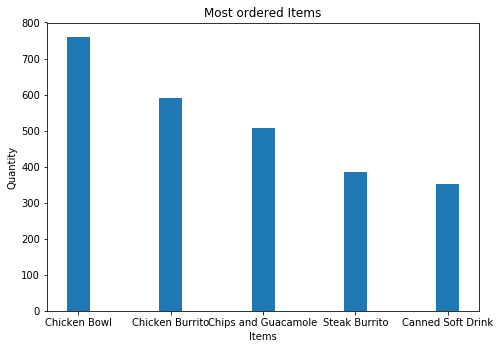

In [77]:
# Alternative solution factoring in quantity of item bought
bought = {}
for index, row in chipo.iterrows():
    name = row['item_name']
    qty = row['quantity']
    if name not in bought:
        bought[name] = qty
    else:
        bought[name] += qty
        
sorted_bought = sorted(bought, key=bought.get, reverse=True)
top_5 = sorted_bought[:5]

x = []
y = []

for item in top_5:
    x.append(item)
    y.append(bought[item])
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y,width = 0.25)
plt.xlabel('Items')
plt.ylabel('Quantity')
plt.title('Most ordered Items')

plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

(0, 1127.4583898011533)

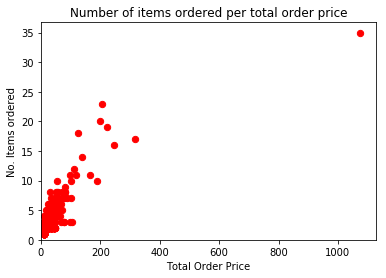

In [93]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
chipo.item_price = [float(str(value)[1:]) for value in chipo.item_price]
x = []
y = []

order_price = {}
order_qty = {}

for index, row in chipo.iterrows():
    orderName = row['order_id']
    qty = row['quantity']
    price = row['item_price']
    if orderName not in order_qty:
        order_qty[orderName] = qty     
    else:
        order_qty[orderName] += qty
        
    if orderName not in order_price:
        order_price[orderName] = price*qty  
    else:
        order_price[orderName] += price*qty 
        
for item in order_price:
    x.append(order_price[item])
for items in order_qty: 
    y.append(order_qty[items])
    
plt.scatter(x, y, s = 40, c = 'red')

# Set the title and labels
plt.xlabel('Total Order Price')
plt.ylabel('No. Items ordered')
plt.title('Number of items ordered per total order price')
plt.ylim(0)
plt.xlim(0)

### Step 7. BONUS: Create a question and a graph to answer your own question.